In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'deepHW2-2/FF_unsupervised'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['.git', 'MNIST', 'main.py', '__pycache__', '.ipynb_checkpoints', 'utils.py', 'main.ipynb']


In [ ]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "US/Eastern"
time.tzset()

main_path = os.path.join(GOOGLE_DRIVE_PATH, 'main.py')

In [ ]:
from main import Unsupervised_FF, train, plot_loss
import torch, torchvision
from torch.utils.data import DataLoader
from utils import prepare_data

In [ ]:
prepare_data()

# Load the MNIST dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
pos_dataset = torchvision.datasets.MNIST(root='./', download=False, transform=transform, train=True)
# pos_dataset = Subset(pos_dataset, list(range(1000)))
# Create the data loader
pos_dataloader = DataLoader(pos_dataset, batch_size=64, shuffle=True, num_workers=4)

# Load the transformed images
neg_dataset = torch.stack(torch.load('transformed_dataset.pt'))
# Create the data loader
neg_dataloader = DataLoader(neg_dataset, batch_size=64, shuffle=True, num_workers=4)

# Load the test images
test_dataset = torchvision.datasets.MNIST(root='./', train=False, download=False, transform=transform)
# Create the data loader
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=4)

100%|██████████| 9912422/9912422 [00:00<00:00, 95510258.98it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 135802347.34it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25760675.97it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16022311.83it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 60000/60000 [01:40<00:00, 599.10it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
device = torch.device("cuda:0")
unsupervised_ff = Unsupervised_FF(device=device, n_epochs=100)

loss = train(unsupervised_ff, pos_dataloader, neg_dataloader)

Streaming output truncated to the last 5000 lines.
Training Last Layer | Epoch 61:  19%|█▉        | 178/938 [00:03<00:13, 56.41it/s]
Training Last Layer | Epoch 61:  20%|█▉        | 186/938 [00:03<00:12, 58.63it/s]
Training Last Layer | Epoch 61:  21%|██        | 194/938 [00:03<00:11, 62.61it/s]
Training Last Layer | Epoch 61:  21%|██▏       | 201/938 [00:03<00:12, 59.55it/s]
Training Last Layer | Epoch 61:  22%|██▏       | 208/938 [00:03<00:12, 58.77it/s]
Training Last Layer | Epoch 61:  23%|██▎       | 214/938 [00:03<00:12, 57.81it/s]
Training Last Layer | Epoch 61:  24%|██▎       | 221/938 [00:03<00:12, 59.14it/s]
Training Last Layer | Epoch 61:  24%|██▍       | 227/938 [00:03<00:12, 58.17it/s]
Training Last Layer | Epoch 61:  25%|██▍       | 233/938 [00:04<00:12, 57.55it/s]
Training Last Layer | Epoch 61:  26%|██▌       | 240/938 [00:04<00:12, 57.13it/s]
Training Last Layer | Epoch 61:  26%|██▋       | 247/938 [00:04<00:11, 57.65it/s]
Training Last Layer | Epoch 61:  27%|██▋       

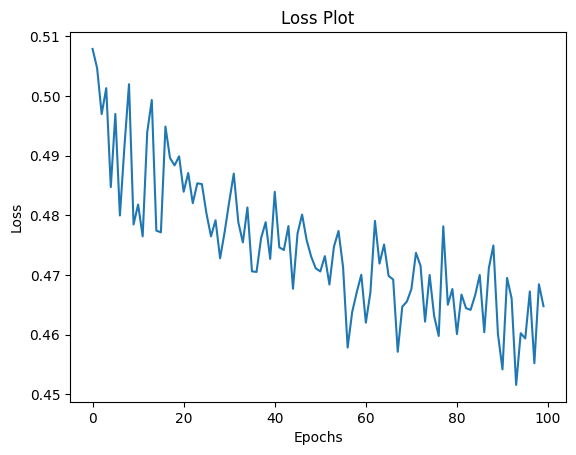

In [ ]:
plot_loss(loss)

In [9]:
unsupervised_ff.evaluate(pos_dataloader, dataset_type="Train")
unsupervised_ff.evaluate(test_dataloader, dataset_type="Test")
print('---')
print('---')
print('---')


Evaluating model:   0%|          | 0/938 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

Evaluating model:  99%|█████████▉| 933/938 [00:11<00:00, 60.62it/s]
                                                                   

Train dataset scores:  accuracy_score: 0.90895



Evaluating model:   0%|          | 0/157 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

Evaluating model:  96%|█████████▌| 150/157 [00:03<00:00, 74.89it/s]
                                                                   

Test dataset scores:  accuracy_score: 0.8983
